# A Gentle Introduction to Python Programming

Python is a versatile programming language and can be used for multiple applications from web development to daata visualisation to machine learning and Graphical User Interface (GUI) development.

This notebook gives a gentle introduction to the use of python and helps demonstrate how we at Xodus can benefit from the use of python and data science in general.

The following topics are covered in this notebook:
- Libraries - installation and importing
- Reading data
- Manipulating data
- Data Visualisations
- Predictive Modelling

## Libraries - installation and importing

Python is supported by a very large open source community that developed ready made libraries. For example, the pandas library is one of the most commonly used libraries for reading and manipulating data. 

The Pandas library contains within itself multiple methods such as "read_csv". These methods are applied to execute actions using the library.

Many python libraries come automatically installed when we install python using Anaconda. However, special libraries need to be installed from time to time depending on what we are trying to do. 

Installation can be done from the command line and also through the notebook here. Let us see how the notebook can be used to install libraries:

In [ ]:
!pip install pandas

The "!" mark indicates to the notebook to perform the action from command line thereby installing the library at the root directory for use in this environment by anyone.

"pip" is the package installer for python. Since we have installed anaconda, another way of installing libraries in python is to use "conda" in place of "pip".

Importing libraries is a way of telling python that we are going to use methods associated with the specific libraries in this program. Sometimes, we do not need all the contents of the library for our job and so we can import specific components from the library. This makes our code light and run faster.

Let us see how to import libraries into the code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings("ignore")

So here we have imported pandas as pd and so as we use methods from this library, we will call pd. This reduces the amount of typing required during the coding exercise and also easy to read. the abriviations "pd", "np", "plt", "sns" are generally used the way shown here. 

So we have now learnt how to install and import various python libraries.

## Reading data

Reading data is very simple in python. Pandas library has a method for each type of data that can be read. One of the most popular file extensions used for storing and sharing data is "csv". We will see how to read csv files here using pandas. In pandas documentation, we can find many other methods for reading other formats of data.

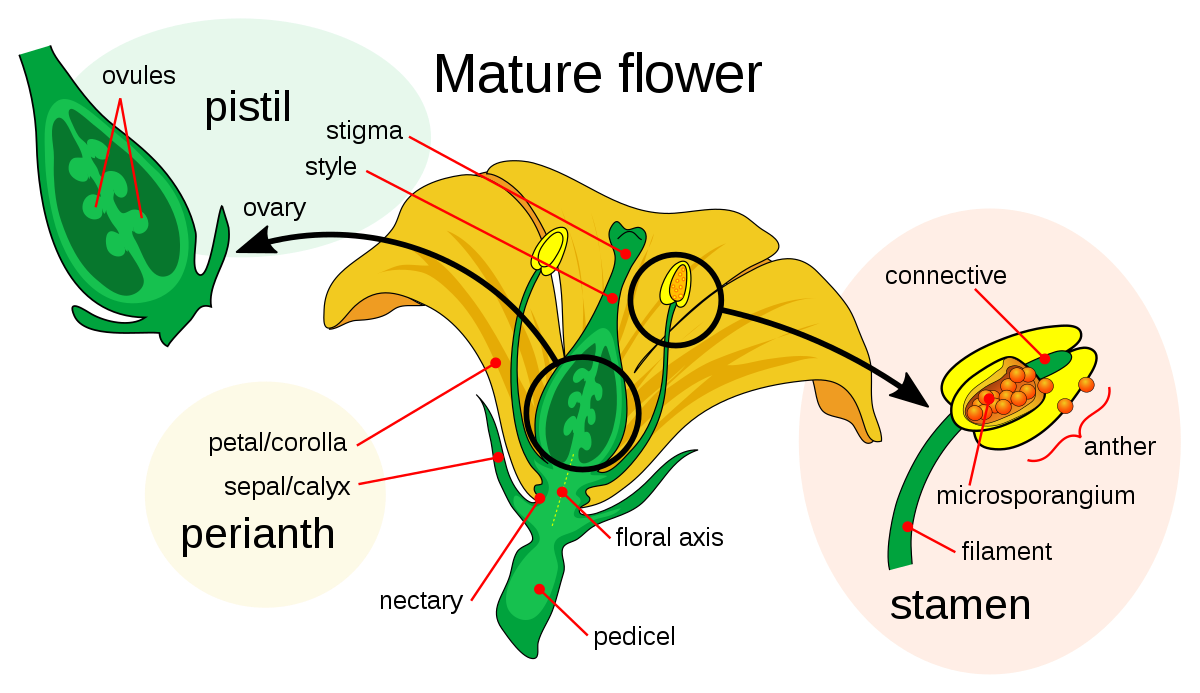

In [2]:
from IPython.display import Image
Image(filename="flower.png", width=600, height=400)

In [3]:
df = pd.read_csv("Iris.csv")

As easy as that! Python has read the data. However, we would like to understand what the data looks like and what it contains. The following few lines will explore the data to show us what it looks like and contains.

In [4]:
df.head() # shows the top 5 rows of data. The # symbols allows us to write comments which wont be executed

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Notice that python follows "zero indexing". The index column without a header is the index that python sees. We can see that there are 6 columns namely:
- Id: This column contains the index used by the csv file. We can either use this index of the python index
- SepalLengthCm: This column contains the length of flower sepals in centimeters
- SepalWidthCm: This column contains the width in cm of the flower sepals
- PetalLengthCm: This column contains the length of petals in cm
- PetalWidthCm: This column contains the width of the petals in cm
- Species: This column contains the name of the flower species

We can use these columns to understand the data a bit more.

In [5]:
df.tail() # shows the last 5 rows of the data.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape # this will show us the number of rows and number of columns in the dataframe

(150, 6)

In [7]:
df.columns # this gives us the names of the columns in the form of a list

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# How many flowers of each species are present in the dataset?
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

We now know what the dataset looks like, what columns there are, what the shape is and we can see from above that it is a balanced dataset since equal number of species are available in all 3 types. Let us now do a bit of visualisation to get a better feel for the data.

## Data Visualisations

Visualising data in various forms allows us to glean a lot of information. We have imported matplotlib.pyplot as plt. Now we will plot a simple scatter plot to see what the data looks like and if we can make much out of the basic visualisation.

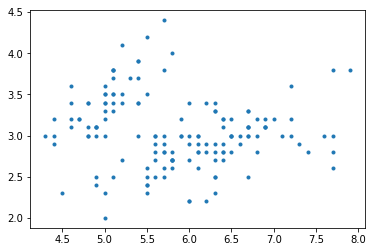

In [10]:
plt.plot(df['SepalLengthCm'],df["SepalWidthCm"],marker='.',linestyle='none')
plt.show()

Although we can see 2 major categories there, it is difficult to say much based on the above chart. Lets add the species names as colour to the chart to see if we can see a differentiation.

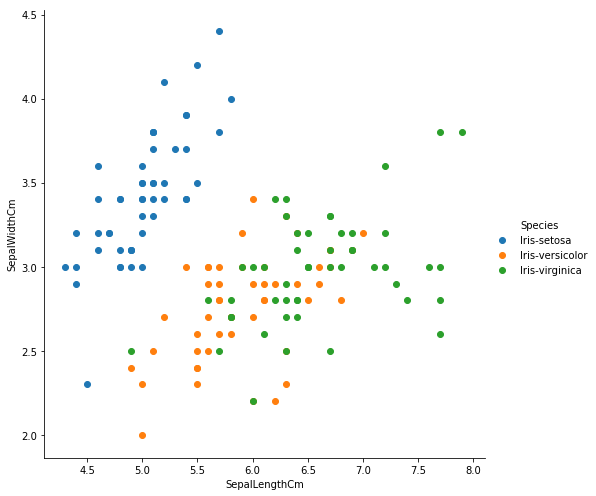

In [12]:
sns.FacetGrid(df, hue="Species", height=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

Now thats a clear visualisation showing 3 different species in 3 different colours showing a segregation of the data. Now we can see that the width and length can be used to segregate various species of flowers. A pair-wise plot of the variables should allow us to visualise the relationships of the variables

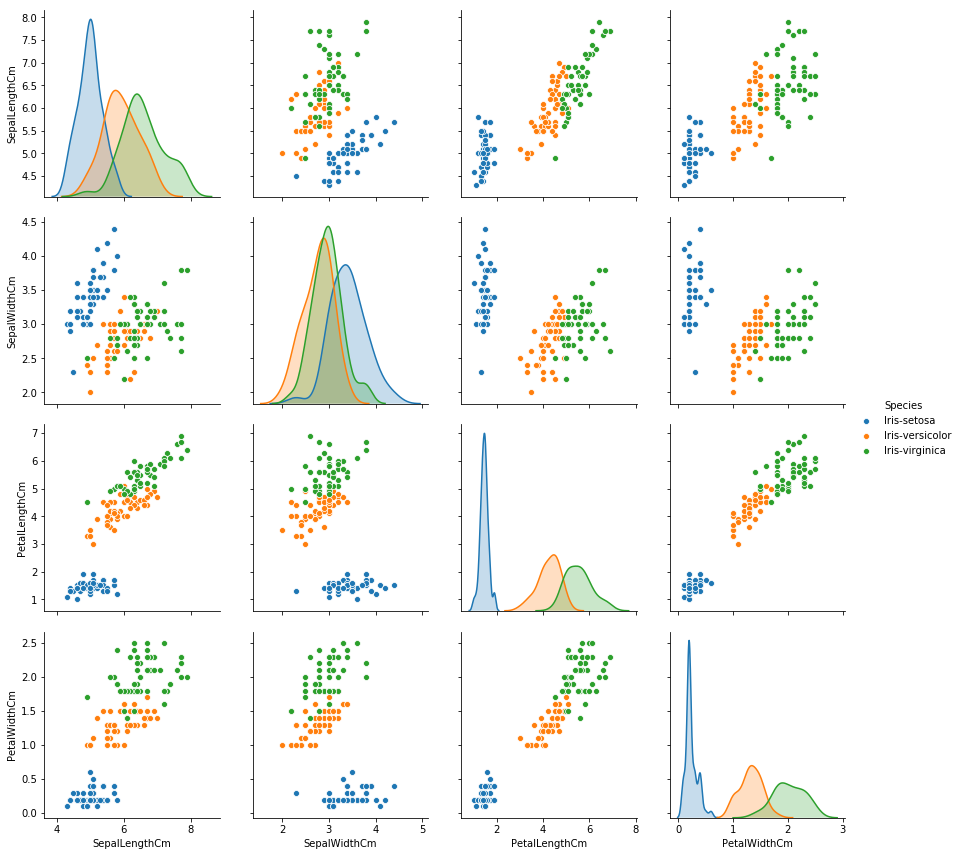

In [16]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3)

The diagonal elements show a kde plot otherwise known as densitiy plots. The above plot allows us to see not only the relationship between variables but alos densities which enable a better understanding of the impact of various variables.

Another very useful visualisation here and for us as Xodus in visualising the impact of various variables on say a machine's performance would be the parallel coordinate plot from pandas. This plots each feature on a separate column & then draws lines connecting the features for each data sample.

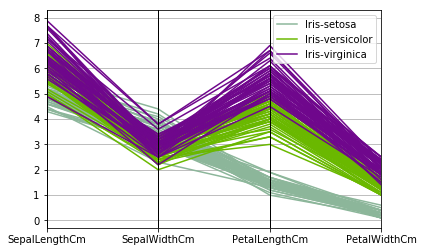

In [17]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")

## Predictive Modelling

We have visualised the data in various forms to understand what the data looks like and what parameters can influence the y-variable. Now, let us see if we can predict the species using the various attribute (x-variables) available.

The first step of a predictive model is to split and test and train sets out of the avaiable data. We will train our model on the train set and test the model's accuracy on the test set. Once we are satisfied, we can deplot the algorithm on production environment with all the bells and whistles.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test=train_test_split(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],df['Species'],random_state=0,train_size=0.75)

In the above code, we imported the test-train split method and plit the X variables and y-variable (Species) based on a 75% to 25% train to test ratio.

### K-Nearest Neighbours

KNN classification is a simple classification algorithm that allows us to separate class variables. The species variable here is a good example of a class variable where we have 3 different species and each species type is a different class. Since this is not a continuous variable (having continuous values like real numbers unlike the species variable which has descrete values).

KNN identifies classification using the nearest neighbours based on the number of neighbours we define in the algorithm. The accuracy depends on how well the data is segregated. In this case, we have seen that the data is well segregated and so this algorithm will help us classify the petals.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbors is the parameter we pass to KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
y_pred=knn.predict(X_test)

In [23]:
print("Training set score: {:.3f}".format(knn.score(X_train,y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test,y_test)))

Training set score: 1.000
Test set score: 0.974


In [24]:
# Examining the effect of changing the n_neighbors parameter of KNN
for neighbors in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    print ('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(knn.score(X_train,y_train)),
           'Test set score: {:.3f}'.format(knn.score(X_test,y_test)) )

neighbors: 1 Training set score: 1.000 Test set score: 0.974
neighbors: 2 Training set score: 0.964 Test set score: 0.974
neighbors: 3 Training set score: 0.964 Test set score: 0.974
neighbors: 4 Training set score: 0.973 Test set score: 0.974
neighbors: 5 Training set score: 0.973 Test set score: 0.974
neighbors: 6 Training set score: 0.964 Test set score: 0.974


So, we have tried to predict with less neighbours and then increased it to see if it makes a difference to the prediction accuracy and it does now. The prediction is pretty accurate for the purposes here and hence we can accept the value.